In [161]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.optimize import linprog

In [172]:
graph = nx.read_graphml('graphs/flow-13n.xml')

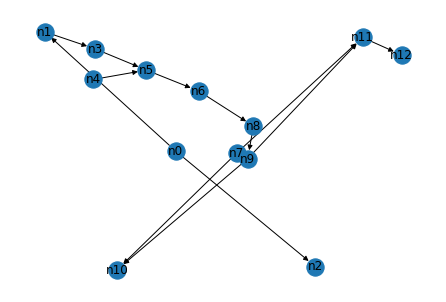

In [173]:
nx.draw(graph, with_labels=True)

In [174]:
def coffman_graham(graph: nx.DiGraph, width: int):
    # step 1: topological sort
    pi = {node: i for i, node in enumerate(list(nx.lexicographical_topological_sort(graph)))}

    # step 2: greedy layering
    V = set(graph.nodes())
    U = set()
    L = [set()]
    
    while len(U) != len(graph.nodes()):
        u = None
        pi_u = -float('inf')

        for node in V:
            if set(nx.neighbors(graph, node)):
                subset_bool = set(nx.neighbors(graph, node)) <= U
            else: 
                subset_bool = True

            if subset_bool and pi[node] > pi_u:
                u = node
                pi_u = pi[node]

        if len(L[-1]) == width or bool(set(nx.neighbors(graph, u)).intersection(L[-1])):
            L.append(set())
            
        L[-1].add(u)
        V.remove(u)
        U.add(u)

    for layer_number, layer in enumerate(L):
        for node_number, node in enumerate(layer):
            graph.nodes[node]['x'] = node_number
            graph.nodes[node]['y'] = layer_number


def dummy_verticies(graph: nx.DiGraph):
    A = []
    b = [-1 for edge in list(graph.edges())]
    c = [0 for node in list(graph.nodes())]
    
    for edge in list(graph.edges()):
        coefficients = [0 for node in list(graph.nodes())]
        coefficients[int(edge[0][1:])] = -1
        coefficients[int(edge[1][1:])] = 1
        c[int(edge[0][1:])] += 1
        c[int(edge[1][1:])] -= 1
        A.append(coefficients)

    bounds = [(0, float('inf')) for node in list(graph.nodes())]
    
    result = linprog(c=c, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex')['x']

    L = [set() for l in range(int(max(result)) + 1)]

    for idx, l in enumerate(result):
         L[int(result[idx])].add(list(graph.nodes())[idx])
    
    for layer_number, layer in enumerate(L):
        for node_number, node in enumerate(layer):
            graph.nodes[node]['x'] = node_number
            graph.nodes[node]['y'] = layer_number

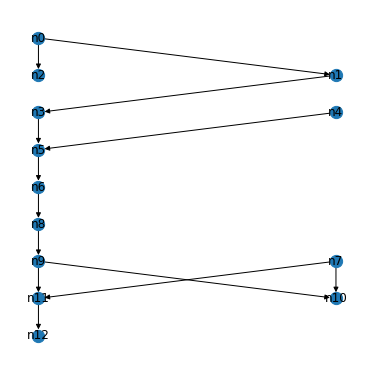

In [175]:
dummy_verticies(graph)
coordinates = {}

for node in list(graph.nodes):
    coordinates[node] = (graph.nodes[node]['x'], graph.nodes[node]['y'])

plt.figure(figsize=(5, 5))

nx.draw(graph, pos=coordinates, with_labels=True, node_size=150)

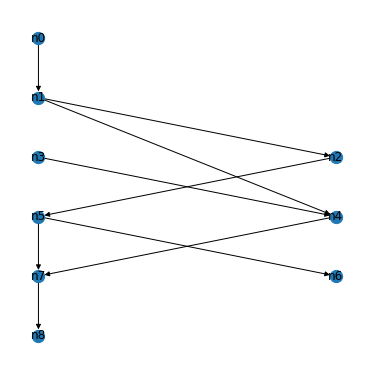

In [166]:
coffman_graham(graph, 3)
coordinates = {}

for node in list(graph.nodes):
    coordinates[node] = (graph.nodes[node]['x'], graph.nodes[node]['y'])

plt.figure(figsize=(5,5))

nx.draw(graph, pos=coordinates, with_labels=True, node_size=150)